## To compare and report period estimates for nicer and hxmt

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

plt.style.use('astro')  # if in ~/.config/matplotlib/stylelib/astro.mplstyle

In [2]:
he_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/HXMT/final_all_hxmt_lc_periods_chisq_HE_manual.txt',sep='\t',comment="#")
me_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/HXMT/final_all_hxmt_lc_periods_chisq_ME_manual.txt',sep='\t',comment="#")
le_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/HXMT/final_all_hxmt_lc_periods_chisq_LE_manual.txt',sep='\t',comment="#")
nicer_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER_second_run/all_lc_periods_manual_error_from_lc_uncor_bootstrap.csv', sep='\t',comment="#")


In [3]:
#individual checks
he_df[he_df['Date']==20160]['PErr']

16    0.000268
Name: PErr, dtype: float64

In [4]:

he_df.head()



,LC_File_Path,Period,Chi-square,Date,freq,PErr
0,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79510,67180,20152.00000,102.091862,0.000009
1,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79503,47540,20153.04139,102.092592,0.000021
2,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79501,69780,20153.22361,102.092800,0.000009
3,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79476,51450,20154.00000,102.095406,0.000023
4,/home/iist/aniket_data/hxmt_raw_data/decompres...,9.79495,10470,20154.00000,102.093426,0.000174


In [5]:
nicer_df.head()

,LC_File_Path,Period,Chi-square,Date,PErr,freq
0,6050390227,9.8008,21567.52930,20112,0.000006,102.032487
1,6050390228,9.8007,19102.22656,20113,0.000010,102.033528
2,6050390229,9.8006,31955.07617,20114,0.000002,102.034569
3,6050390230,9.8005,20849.02930,20115,0.000024,102.035610
4,6050390231,9.8004,29042.08008,20116,0.000021,102.036652


In [6]:
he_df = he_df[he_df['PErr'] != 0]
me_df = me_df[me_df['PErr'] != 0]
le_df = le_df[le_df['PErr'] != 0]

sigmaP/P^2 = sigma f: Error in frequency

In [7]:
Nicer_freqErr=1000*nicer_df['PErr']/nicer_df['Period']**2

he_df_freqErr=1000*he_df['PErr']/he_df['Period']**2

me_df_freqErr=1000*me_df['PErr']/me_df['Period']**2

le_df_freqErr=1000*le_df['PErr']/le_df['Period']**2


<ErrorbarContainer object of 3 artists>

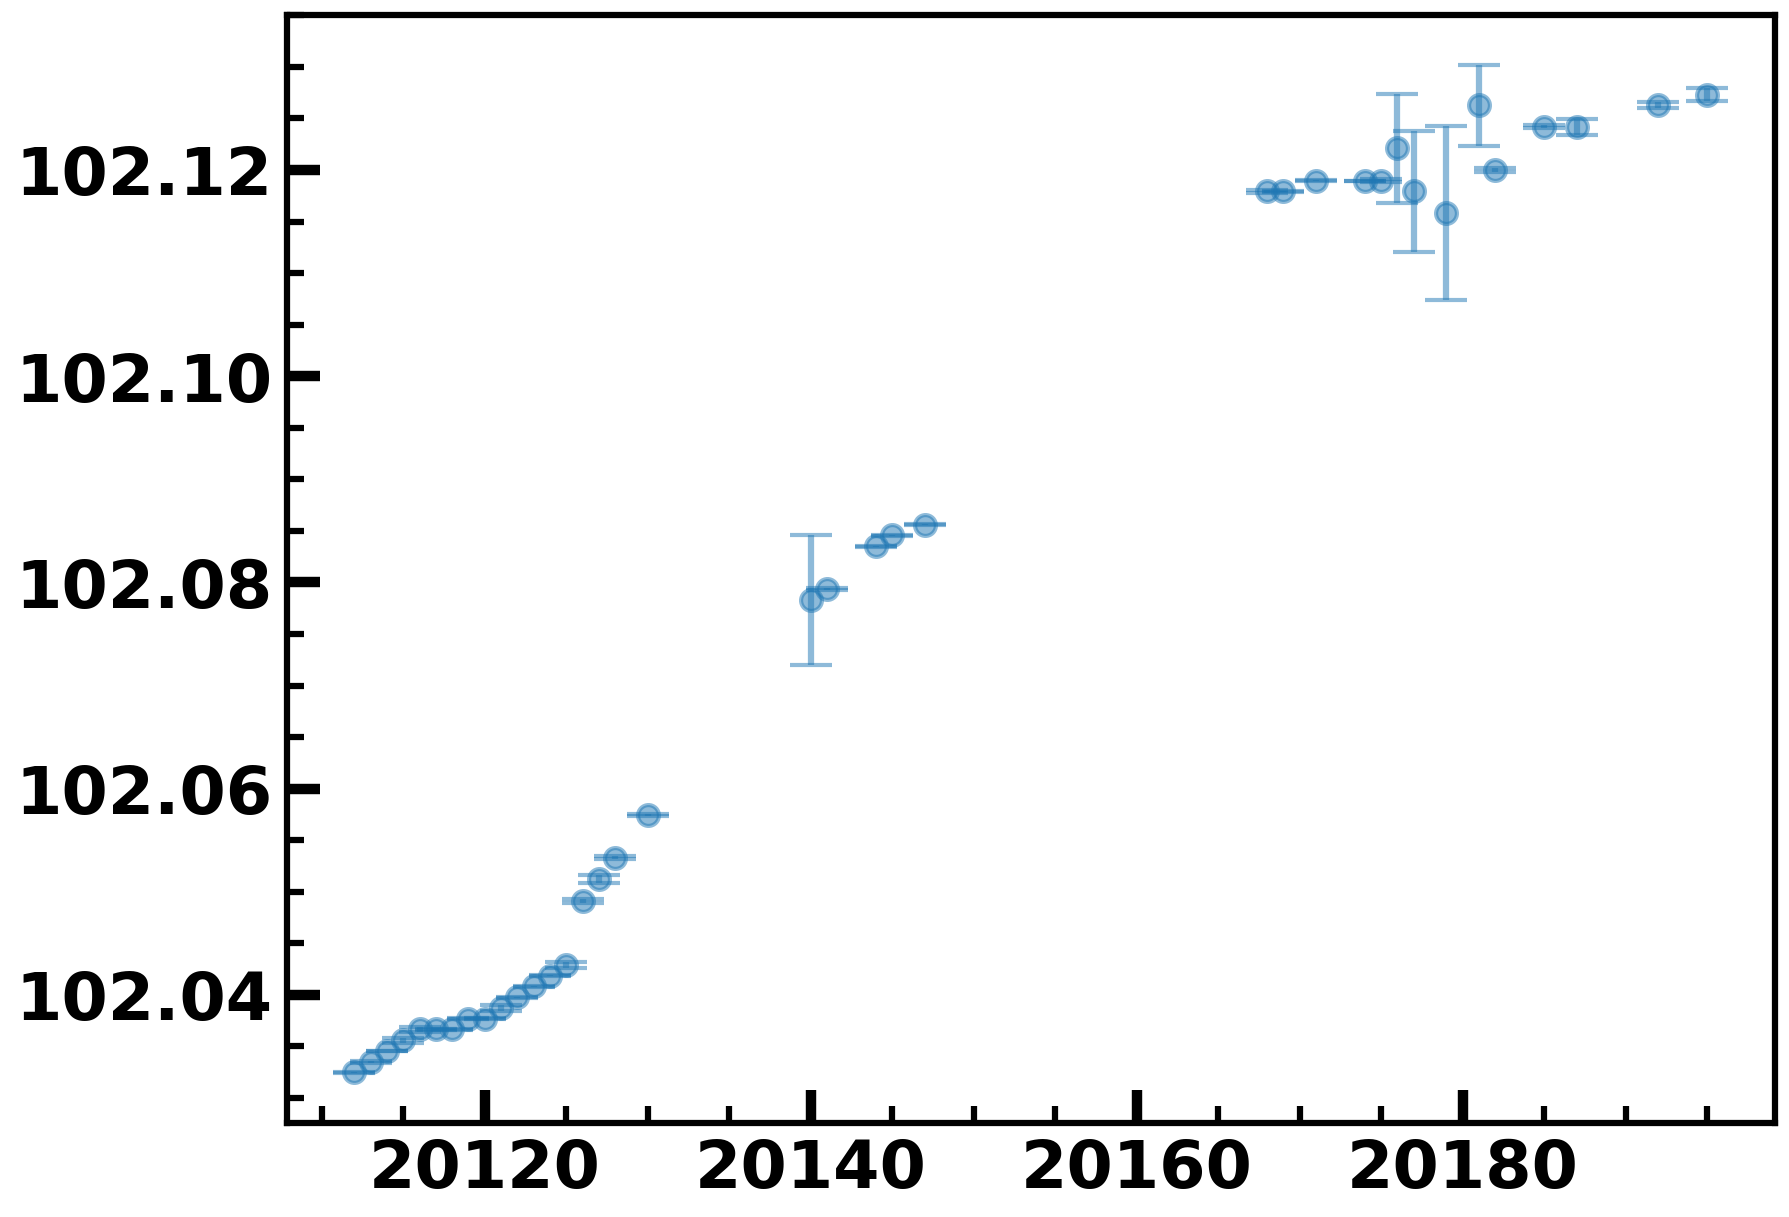

In [8]:
plt.errorbar(nicer_df['Date'],nicer_df['freq'],yerr=Nicer_freqErr, capsize=5,markersize=5,fmt="o", alpha=0.5)

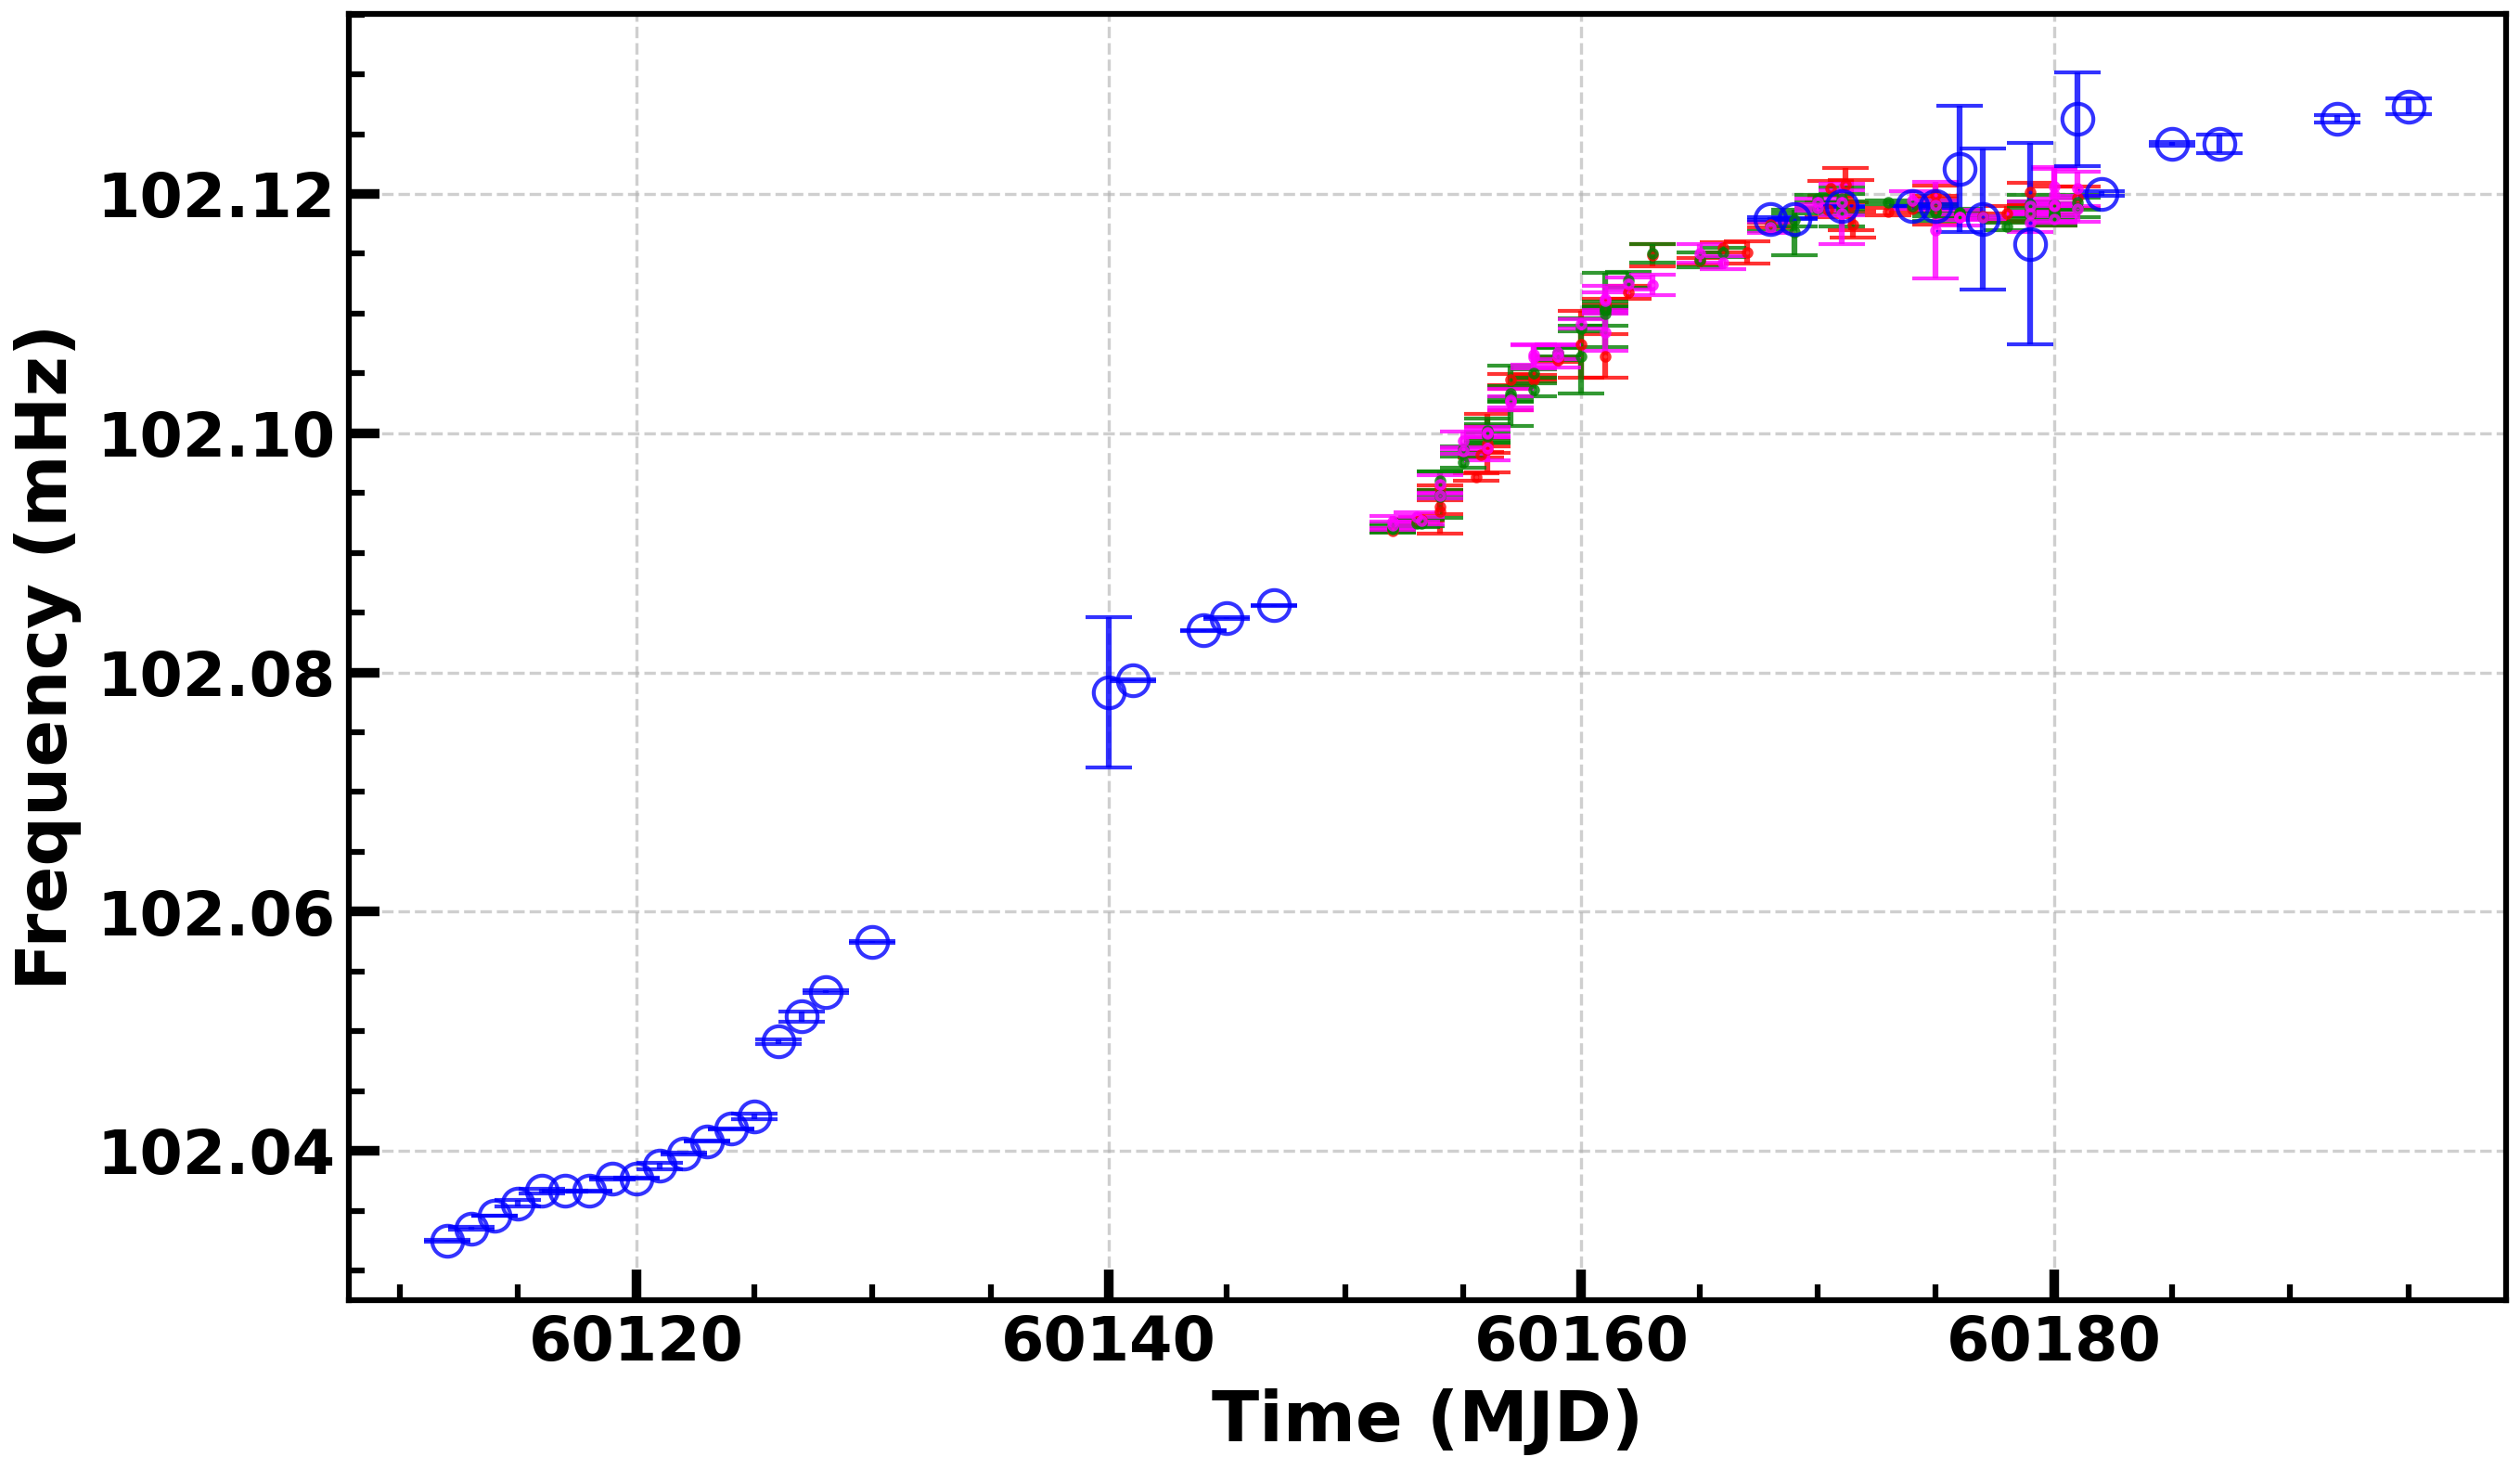

In [13]:
plt.figure(figsize=(10,6))

plt.errorbar(he_df['Date']+40000,1000/he_df['Period'],yerr=he_df_freqErr, capsize=6,markersize=2,fmt="o", alpha=0.8, label="HE",color='red',markerfacecolor='none')
plt.errorbar(me_df['Date']+40000,1000/me_df['Period'],yerr=me_df_freqErr, capsize=6,markersize=2,fmt="o", alpha=0.8,label="ME",color='green',markerfacecolor='none') 
plt.errorbar(le_df['Date']+40000,1000/le_df['Period'],yerr=le_df_freqErr, capsize=6,markersize=2,fmt="o", alpha=0.8, label="LE",color='magenta',markerfacecolor='none')
plt.errorbar(nicer_df['Date']+40000,nicer_df['freq'],yerr=Nicer_freqErr, capsize=6,markersize=8,fmt="o", alpha=0.8, color='blue',label="NICER",markerfacecolor='none')


plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Frequency (mHz)',weight='bold')
plt.xlabel('Time (MJD)',weight='bold')

#plt.title('J0243 HXMT Frequency Evolution')

#plt.xlim(60150,60184)
#plt.ylim(102.1,102.2)

plt.savefig('/home/supremekai/thesis/J0243_6p6124/period_evolution_redHE_meGREEN_leMAGENTA.png')
plt.show()

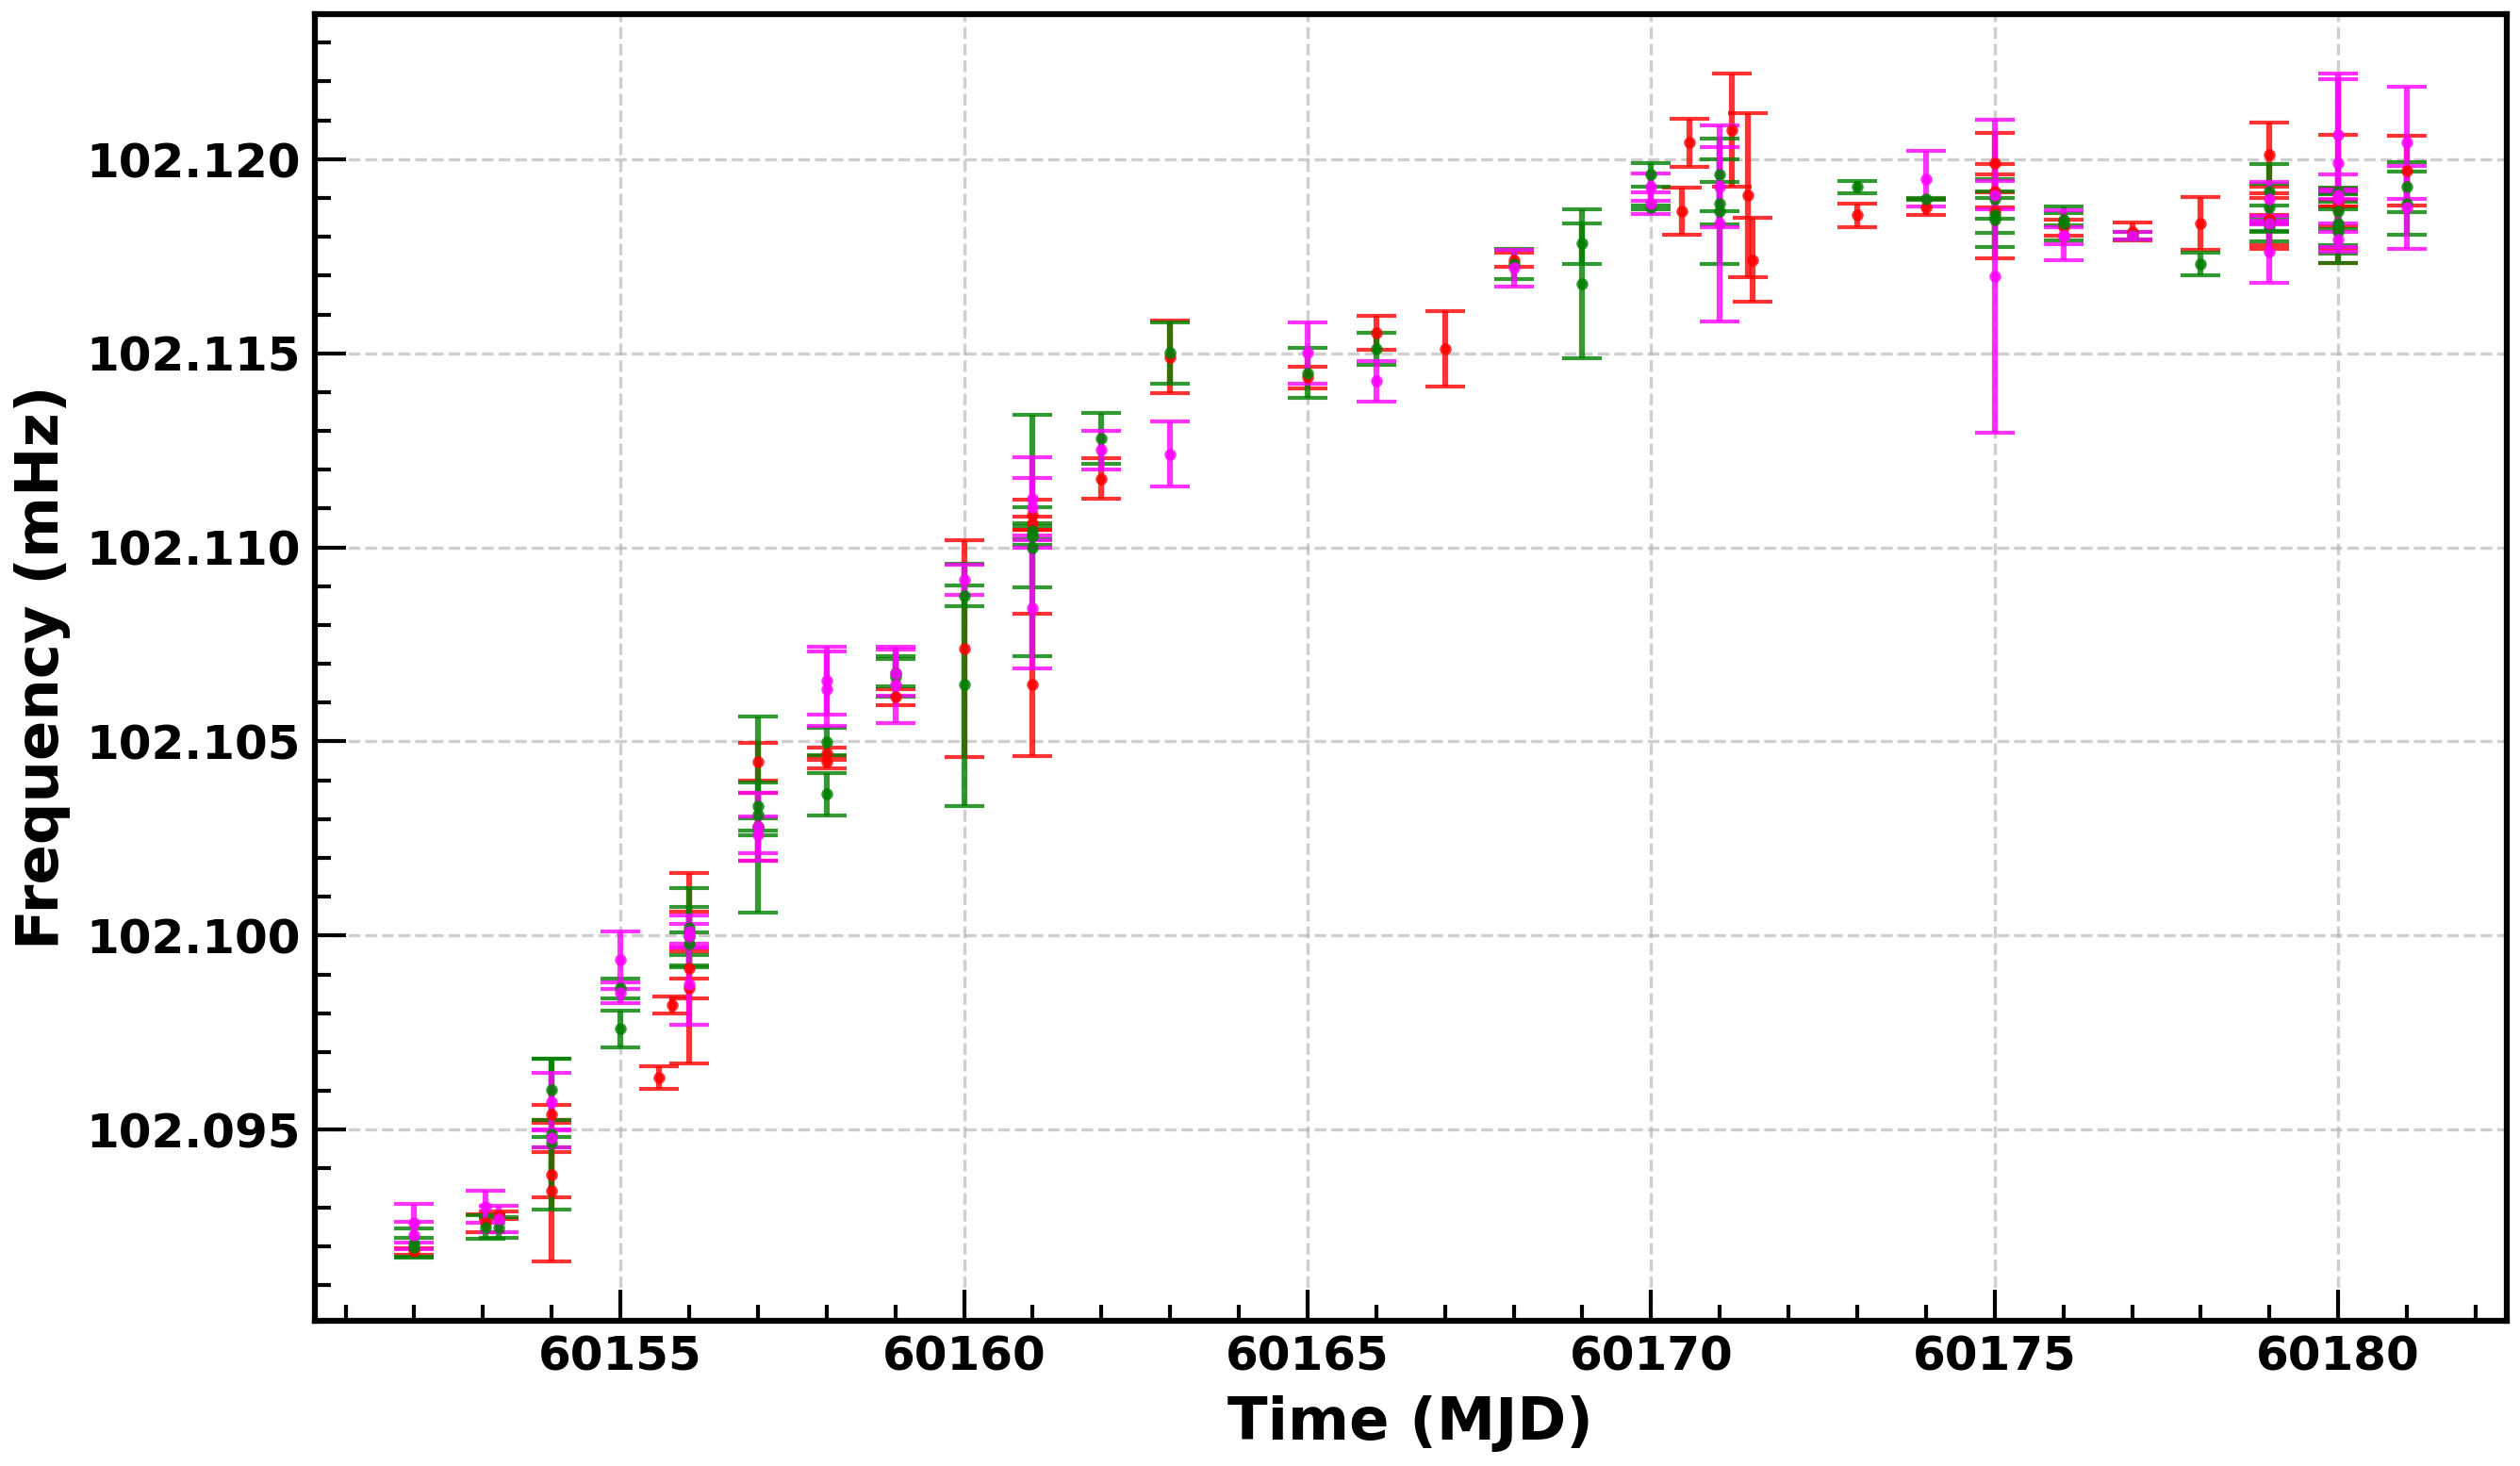

In [17]:
plt.figure(figsize=(10,6))

plt.errorbar(he_df['Date']+40000,1000/he_df['Period'],yerr=he_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="HE",color='red')
plt.errorbar(me_df['Date']+40000,1000/me_df['Period'],yerr=me_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8,label="ME",color='green') 
plt.errorbar(le_df['Date']+40000,1000/le_df['Period'],yerr=le_df_freqErr, capsize=5,markersize=2,fmt="o", alpha=0.8, label="LE",color='magenta')
# plt.errorbar(nicer_df['Date']+40000,nicer_df['freq'],yerr=Nicer_freqErr, capsize=2,markersize=2,fmt="o", alpha=0.8, color='blue',label="NICER")


plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Frequency (mHz)',weight='bold')
plt.xlabel('Time (MJD)',weight='bold')

#plt.title('J0243 HXMT Frequency Evolution')

#plt.xlim(60150,60184)
#plt.ylim(102.1,102.2)

plt.savefig('/home/supremekai/thesis/J0243_6p6124/insight_hxmt_frequency.png')
plt.show()

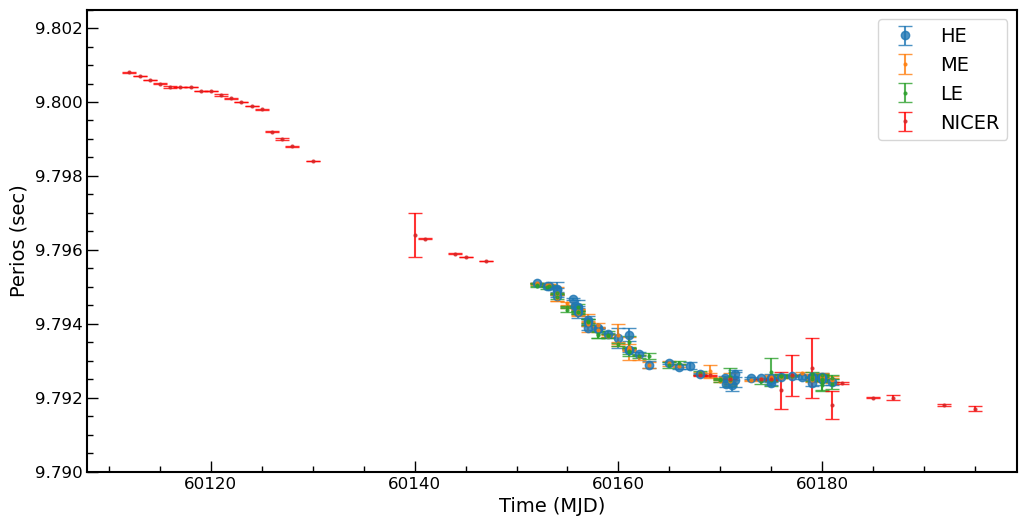

In [22]:
plt.figure(figsize=(12,6))

plt.errorbar(he_df['Date']+40000,he_df['Period'],yerr=he_df['PErr'], capsize=5,markersize=6,fmt="o", alpha=0.8, label="HE")
plt.errorbar(me_df['Date']+40000,me_df['Period'],yerr=me_df['PErr'], capsize=5,markersize=2,fmt="o", alpha=0.8,label="ME") 
plt.errorbar(le_df['Date']+40000,le_df['Period'],yerr=le_df['PErr'], capsize=5,markersize=2,fmt="o", alpha=0.8, label="LE")
plt.errorbar(nicer_df['Date']+40000,nicer_df['Period'],yerr=nicer_df['PErr'], capsize=5,markersize=2,fmt="o", alpha=0.8, ecolor='red',label="NICER")

plt.legend()
plt.minorticks_on()
plt.ylabel('Perios (sec)')
plt.xlabel('Time (MJD)')
# plt.title('J0243 HXMT Period Evolution')

#plt.xlim(60150,60189)
plt.ylim(9.790,9.8025)
plt.show()

In [ ]:
# plt.figure(figsize=(8, 5))
# plt.scatter(df['MJD'], df['Lumin'], color='g', label='Luminosity_HXMT',alpha=0.6)
# plt.scatter(df_2['MJD'], df_2['Lumin'], color='b', label='Luminosity_NICER',alpha=0.6)
# #plt.scatter(df_old['MJD'], df_old['Lumin'], color='r', label='Luminosity_NICER_old',alpha=0.6)
# plt.ylabel("Luminosity from (0.8-10.0 keV flux) ")
# plt.xlabel("MJD")
# plt.legend()
# plt.grid()

In [ ]:
# plt.scatter(he_df['Date'],he_df['Chi-square'])
# plt.scatter(me_df['Date'],me_df['Chi-square'])
# plt.scatter(le_df['Date'],le_df['Chi-square'])
# plt.scatter(nicer_df['TSTARTI'],nicer_df['Chi-square'])
# plt.xlim(20150,20189)
# # plt.ylim(200,2000)

## Plotting panel

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# at top of your scripts, once:
plt.style.use('astro')  # if in ~/.config/matplotlib/stylelib/astro.mplstyle


In [46]:
def read_and_plot_fits_file(file_paths, labels,savepath):

    n_files = len(file_paths)
    assert n_files <= 9, "This script supports up to 9 panels."
    if labels:
        assert len(labels) == 3, "You must pass exactly 3 labels—one per column."


    # Define colors for LE, ME, HE
    colors = {
        'LE': 'darkgreen',
        'ME': 'magenta',
        'HE': 'red'
    }

    # Define custom y-limits for each row
    row_limits = {
        0: (0.45, 1.4),   # Top row
        1: (0.45, 1.76),   # Middle row
        2: (0.5, 2.2)    # Bottom row
    }

    # Create 3x3 grid of subplots
    fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True,
                            gridspec_kw={'hspace': 0, 'wspace': 0.08})
    axs = axs.flatten()

    for i, file in enumerate(file_paths):
        with fits.open(file) as hdul:
            data = hdul[1].data
            phase = data['PHASE']
            rate = data['RATE1']

            # Extend phase and normalize rate
            extended_phase = np.concatenate([phase, phase + 1])
            extended_rate = np.concatenate([rate, rate]) / np.mean(rate)

            # Determine color
            if '/LE/' in file:
                color = colors['LE']
            elif '/ME/' in file:
                color = colors['ME']
            elif '/HE/' in file:
                color = colors['HE']
            else:
                color = 'black'

            col_idx = i % 3  # Column index (0, 1, 2)

            axs[i].plot(extended_phase, extended_rate, marker='o', linestyle='-',
                        alpha=0.8, color=color)

            # Add legend only to top row of each column
            if i // 3 == 0:  # Top row only
                axs[i].legend([labels[col_idx]], fontsize=16, loc='upper right')

            axs[i].grid(alpha=0.5, linestyle='--')
            axs[i].minorticks_on()
            axs[i].set_xlim(0, 2.01)
            #Assign different y limits for each row
            row_idx = i // 3
            axs[i].set_ylim(row_limits[row_idx])

            #axs[i].tick_params(labelsize=14)
            axs[i].tick_params(axis='both', which='major', width=3, length=8)
            axs[i].tick_params(axis='y', which='minor', width=2, length=4)
            axs[i].tick_params(axis='x', which='minor', width=2, length=4)

            # Hide internal y-axis labels
            if i % 3 != 0:
                axs[i].tick_params(labelleft=False)

    for ax in axs:
        ax.label_outer()

    # Add shared axis labels
    fig.text(0.5, 0.02, 'Phase', ha='center', fontsize=18)
    fig.text(0.001, 0.5, 'Normalized Count Rate', va='center', rotation='vertical', fontsize=18)

    # Layout adjustment
    plt.subplots_adjust(left=0.06, right=0.98, top=0.95, bottom=0.07, hspace=0, wspace=3)
    plt.savefig(savepath, dpi=500, bbox_inches='tight')
    plt.show()


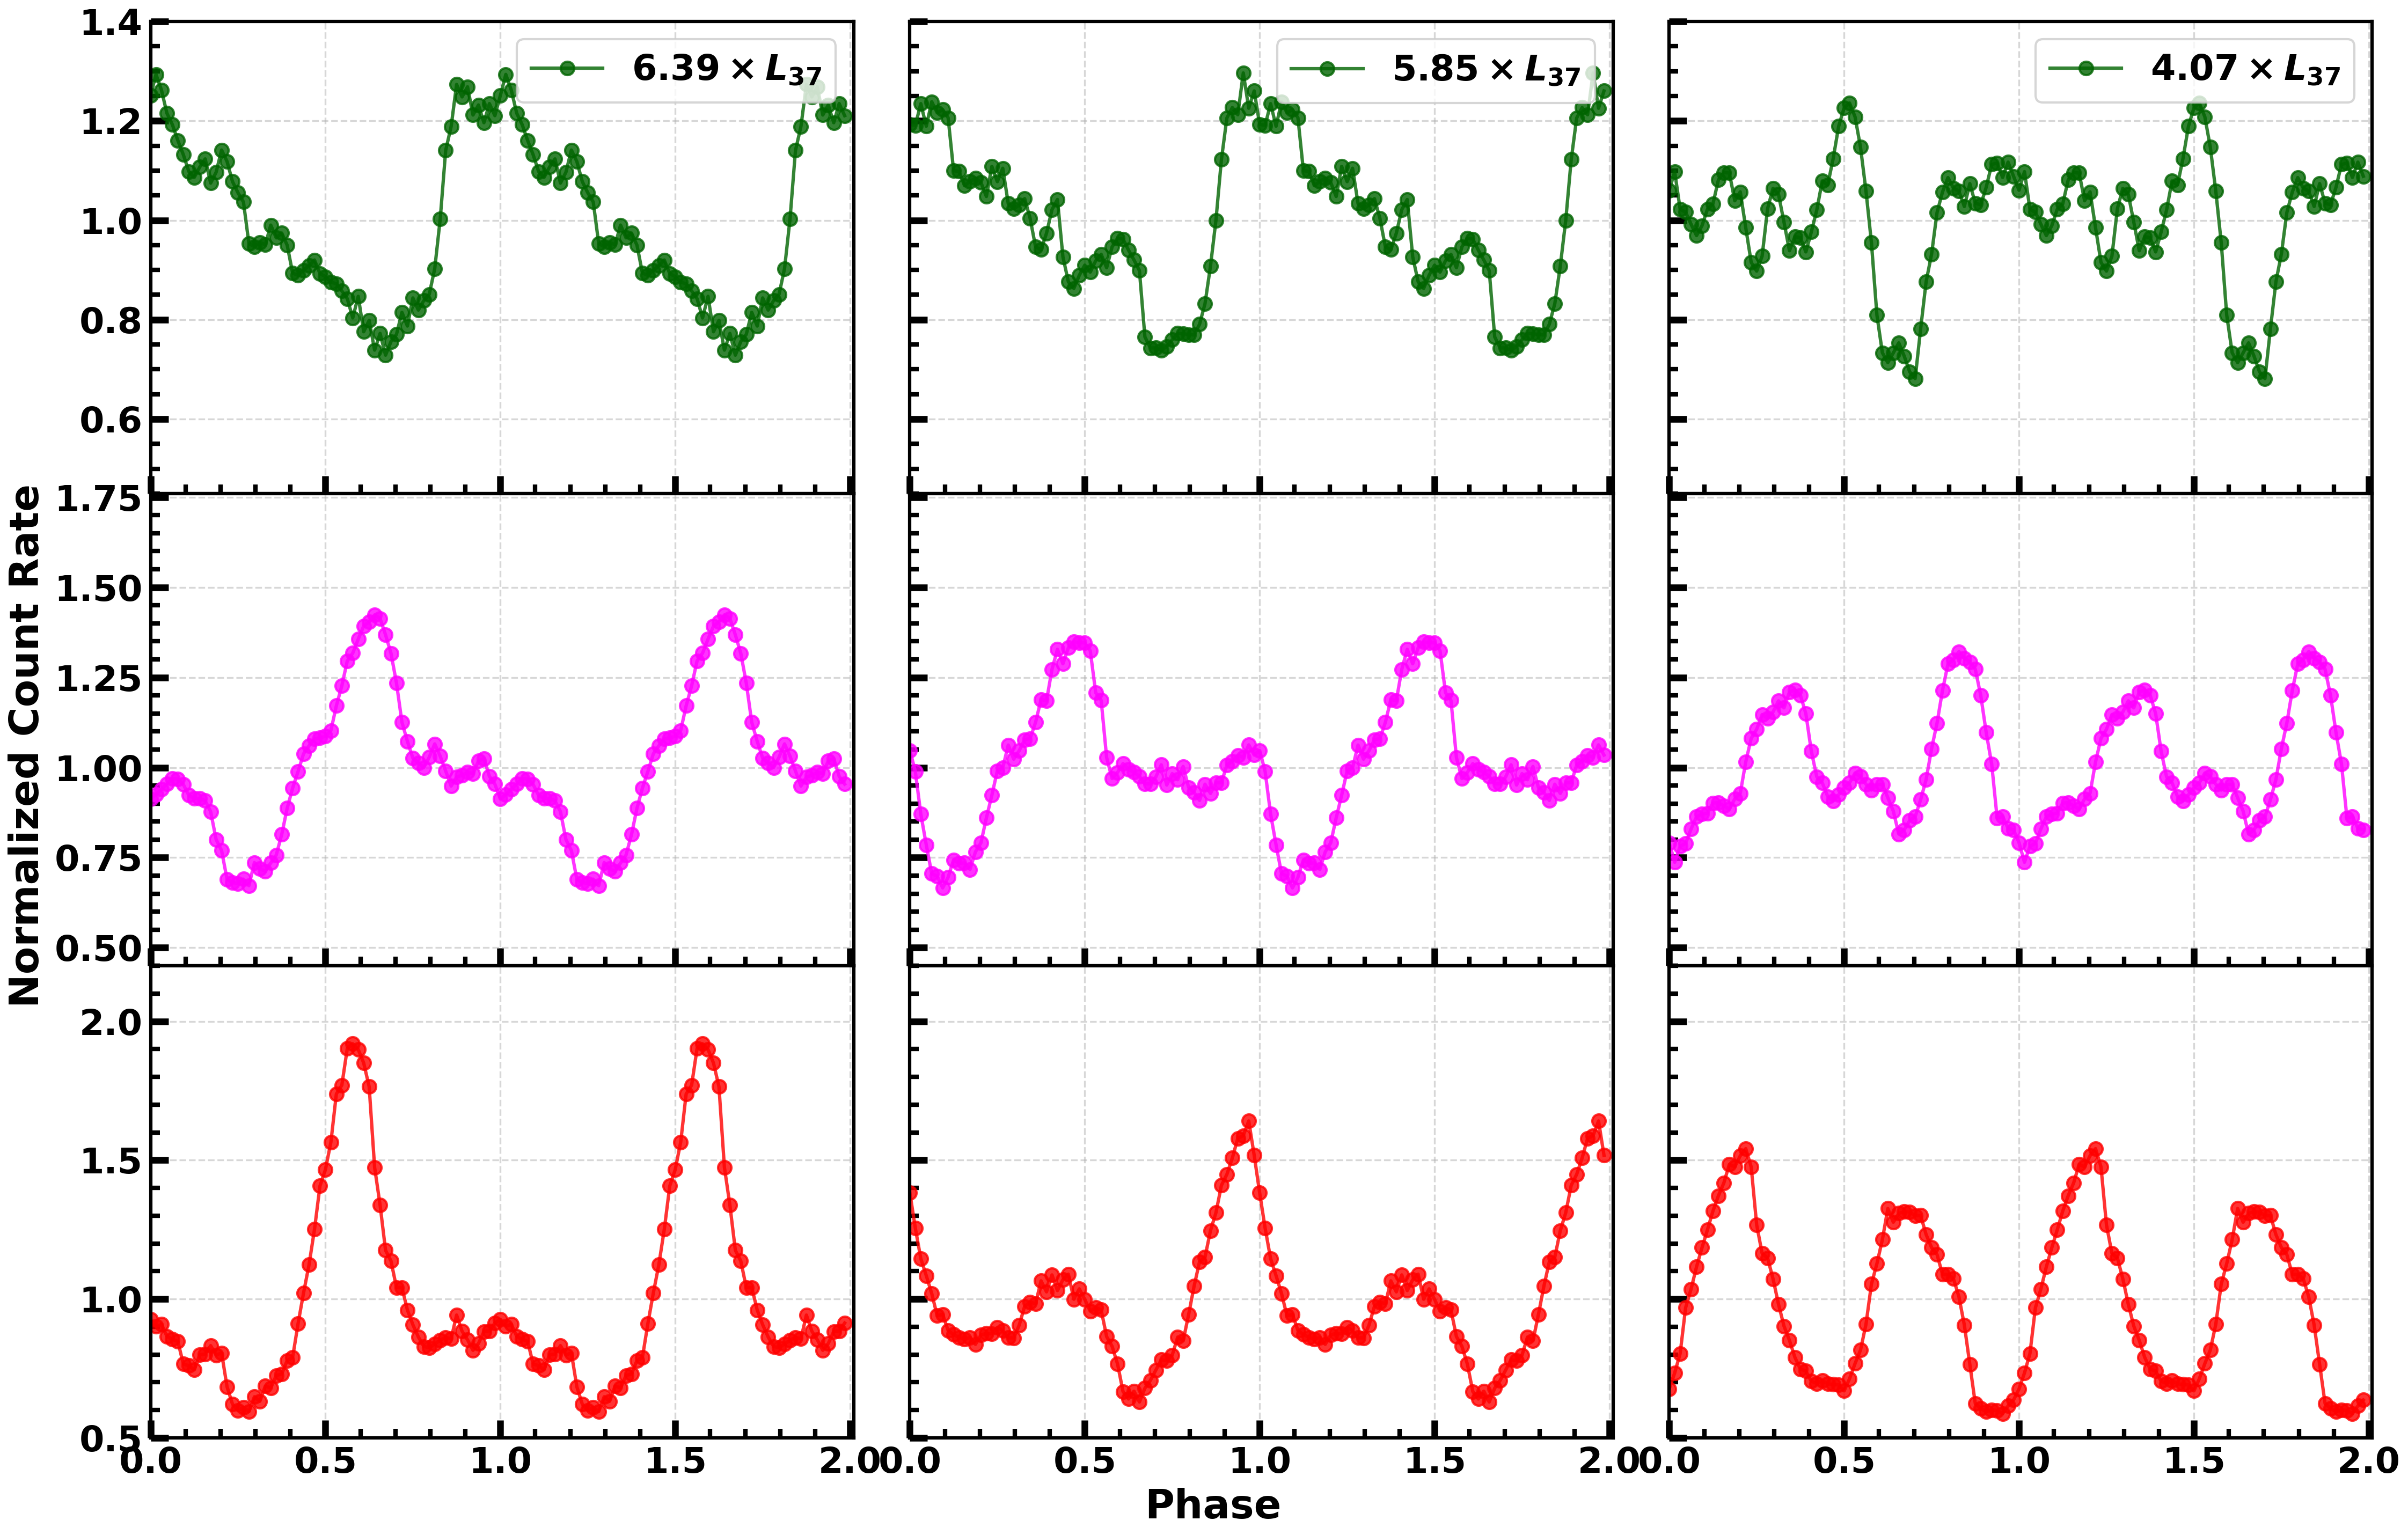

In [47]:
file_paths=[ 
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600502/LE/P050419600502_LE_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600901/LE/P050419600901_LE_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419602002/LE/P050419602002_LE_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600502/ME/P050419600502_ME_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600901/ME/P050419600901_ME_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419602002/ME/P050419602002_ME_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600502/HE/P050419600502_HE_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600901/HE/P050419600901_HE_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419602002/HE/P050419602002_HE_pulse_profile_efold_output_same_epoch.fits'
]

label_lumin=[r'$6.39\times L_{37}$',r'$5.85\times L_{37}$',r'$4.07\times L_{37}$']

savepath='/home/supremekai/thesis/J0243_6p6124/plot_hxmt_luminosity_energy_variation.png'

read_and_plot_fits_file(file_paths,label_lumin,savepath)

In [17]:
from astropy.io import fits
import numpy as np

def plot_combined_light_curve(file_paths):
    """
    Plots the combined light curve by adding LE and ME rates from the provided file paths.

    Parameters:
    file_paths (list): List of file paths to the FITS files.

    Returns:
    None
    """
    import matplotlib.pyplot as plt

    # Separate LE and ME files
    le_files = [file for file in file_paths if '/LE/' in file]
    me_files = [file for file in file_paths if '/ME/' in file]

    # Ensure LE and ME files are paired correctly
    assert len(le_files) == len(me_files), "Number of LE and ME files must be the same."

    plt.figure(figsize=(10, 6))

    for le_file, me_file in zip(le_files, me_files):
        with fits.open(le_file) as le_hdul, fits.open(me_file) as me_hdul:
            le_data = le_hdul[1].data
            me_data = me_hdul[1].data

            # Combine LE and ME rates
            combined_rate = le_data['RATE1'] + me_data['RATE1']

            # Extend phase for 2 cycles
            extended_phase = np.concatenate([le_data['PHASE'], le_data['PHASE'] + 1])
            extended_combined_rate = np.concatenate([combined_rate, combined_rate]) / np.max(combined_rate)

            # Plot the combined light curve
            plt.plot(extended_phase, extended_combined_rate, marker='o', linestyle='-', label=le_file.split('/')[-2])

    plt.xlabel('Phase')
    plt.ylabel('Normalized Combined Count Rate (LE + ME)')
    plt.legend()
    plt.grid()
    plt.title('Combined Light Curve (LE + ME)')
    plt.show()

In [6]:
# file_paths=[
# '/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600901/LE/P050419600901_LE_pulse_profile_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600901/ME/P050419600901_ME_pulse_profile_efold_output_same_epoch.fits',
# ]

# plot_combined_light_curve(file_paths)

## Plotting individual plots

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
plt.style.use('astro')

In [2]:
def read_and_plot_fits_file(file_path):

    plt.figure(figsize=(10, 6))
    for files in file_path:
        print(files)
        # Open the FITS file
        with fits.open(files) as hdul:

            # Assuming you want to plot the first HDU (Header Data Unit)
            data = hdul[1].data

            # Plotting the data
            plt.plot(data['PHASE'], data['RATE1'], marker='o', linestyle='-', label=files.split('/')[-2])

    plt.xlabel('PHASE')
    plt.ylabel('RATE1')
    plt.title('Combined Period vs Date from FITS files')
    plt.legend()
    plt.grid()

/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419601801/LE/P050419601801_LE_pulse_profile_efold_output_same_epoch.fits


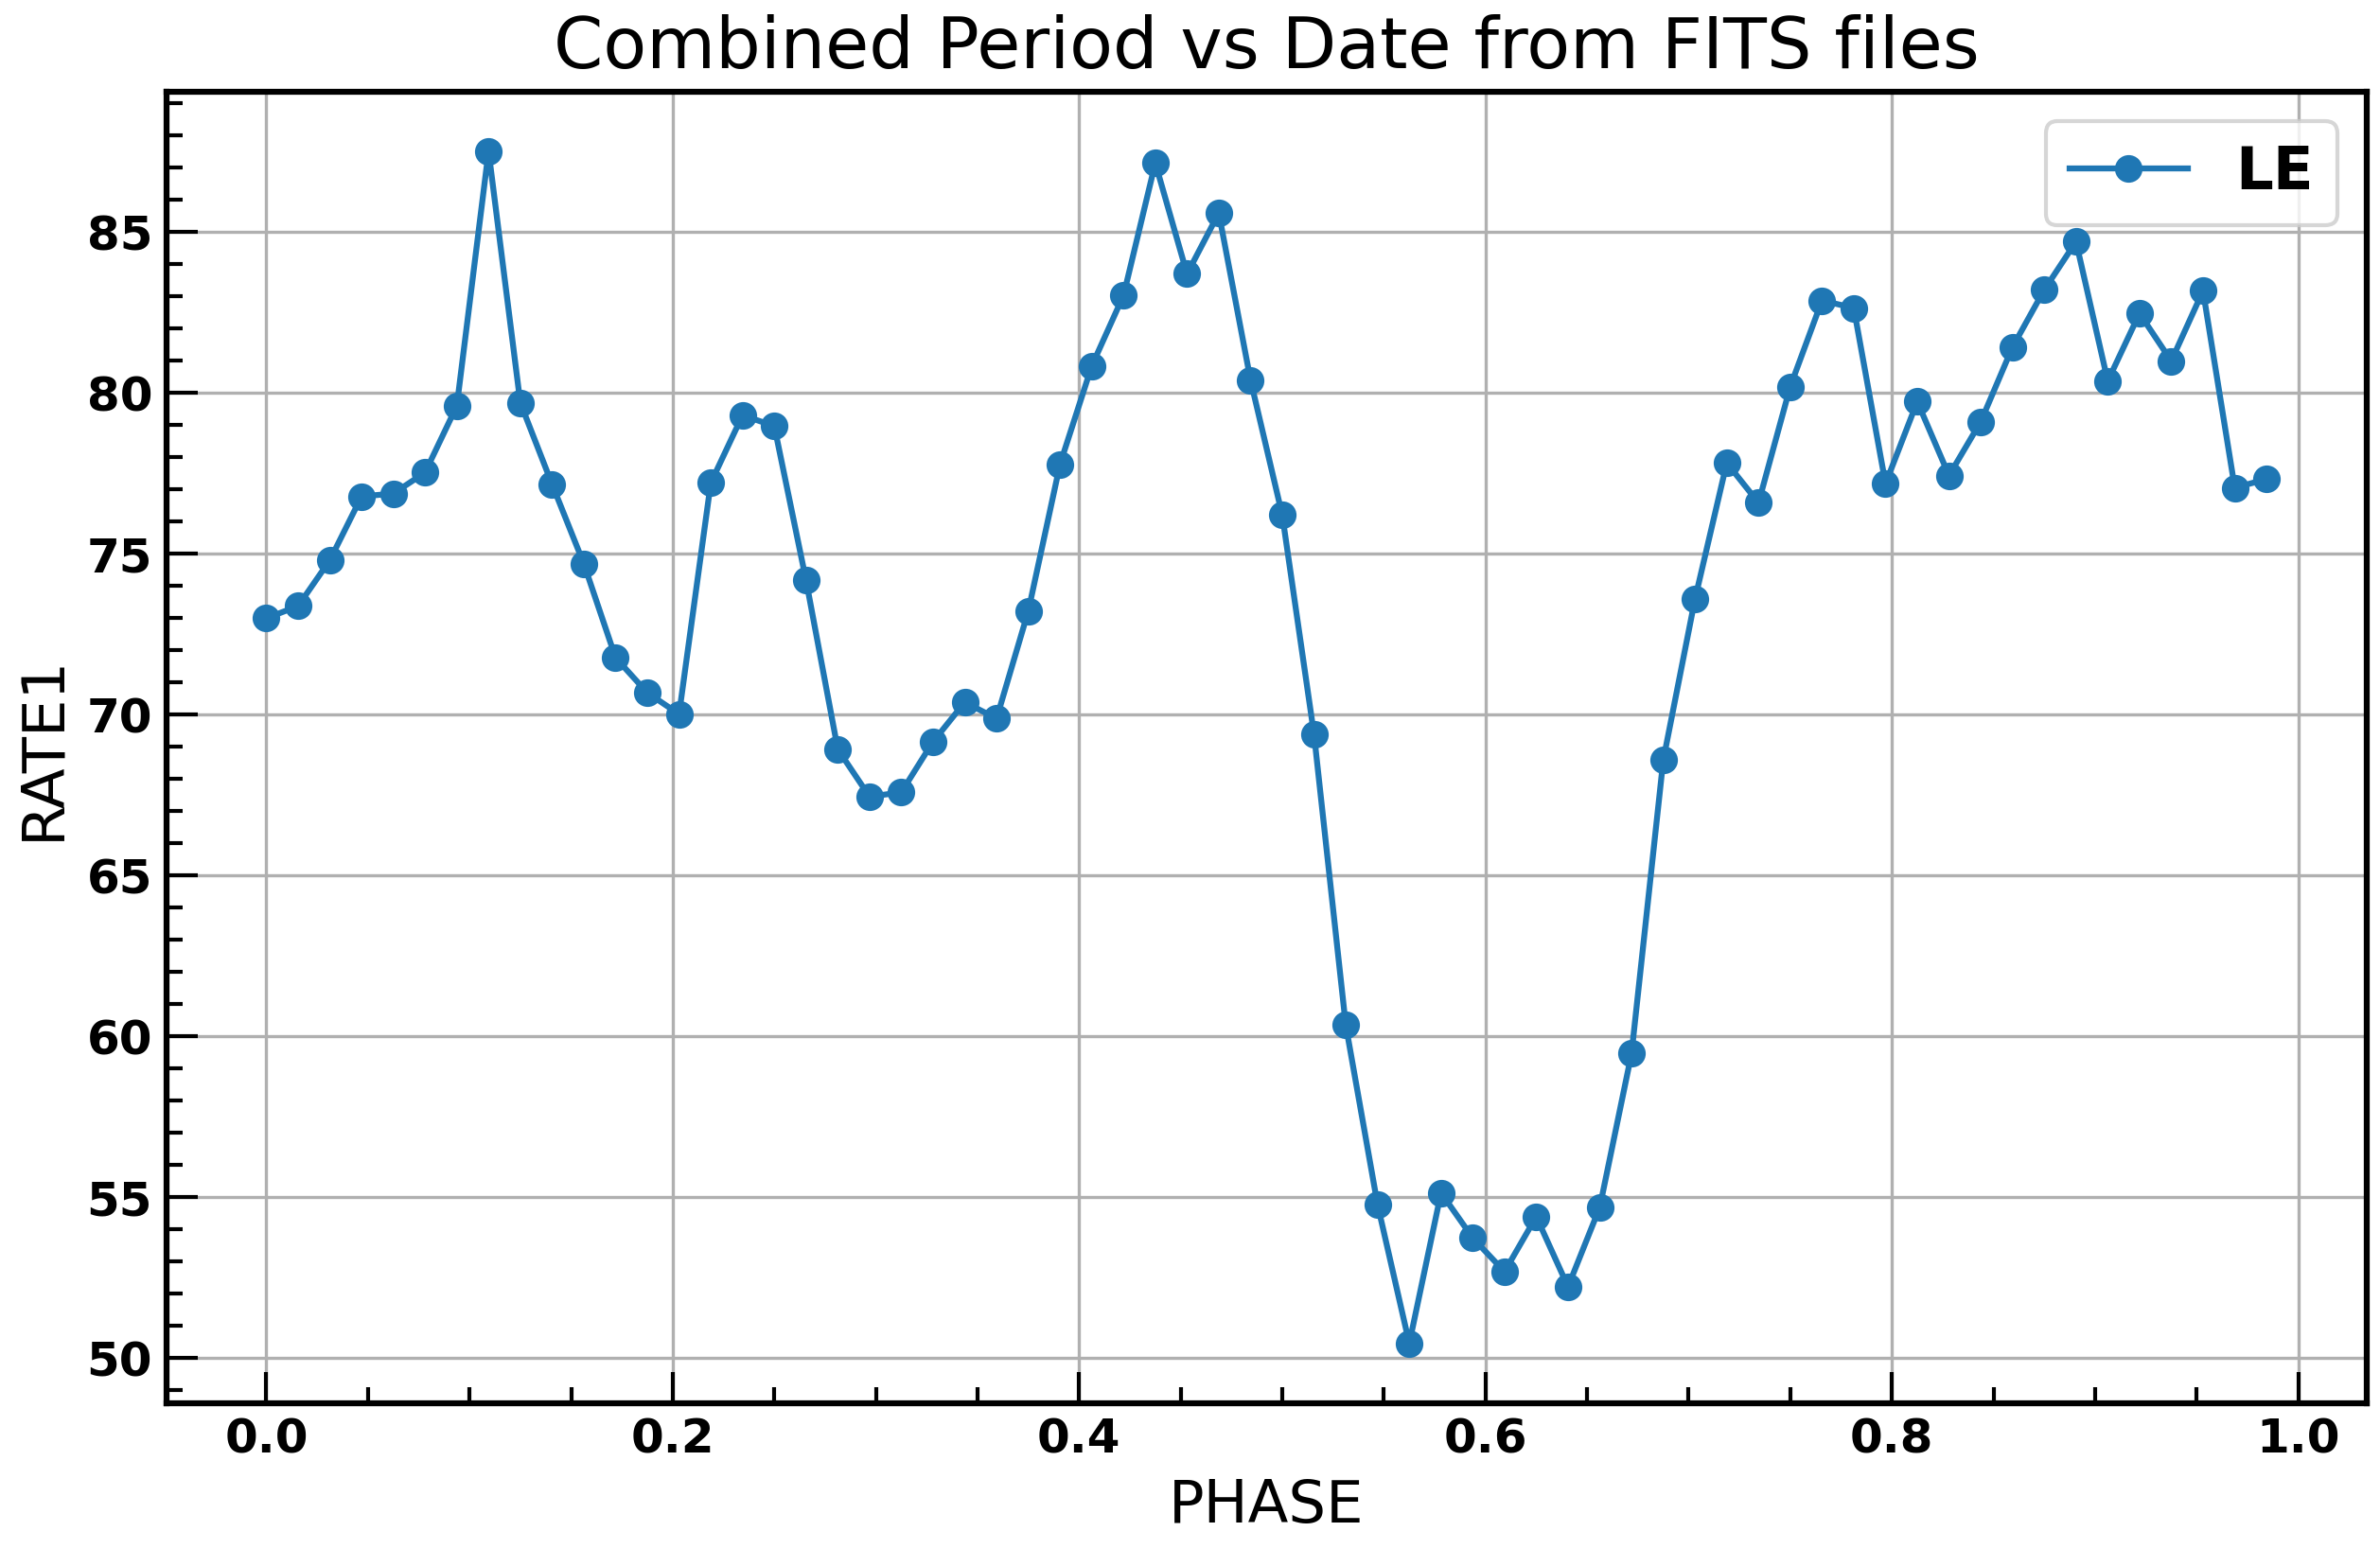

In [3]:
file_paths=[
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419601801/LE/P050419601801_LE_pulse_profile_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419601903/LE/P050419601903_LE_pulse_profile_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419601603/LE/P050419601603_LE_pulse_profile_efold_output_same_epoch.fits'
]

read_and_plot_fits_file(file_paths)